# Lab 2: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it. 

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided: 
* charges: the medical cost 

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions. 

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?

In [135]:
# your code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# load data with pandas
url = 'https://github.com/cisdatasciencetu/CIS3715_DataScience_2023/raw/main/Lab02/insurance.csv'
df = pd.read_csv(url)
dfCopy = pd.read_csv(url)

# print information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Analaysis:
There are 4 numerical features: age, bmi, children, and charges.

There are 3 categorial features: sex, smoker, and regions.

### Q2. Check whether there are missing values in this dataset.

In [136]:
# your code

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature. 


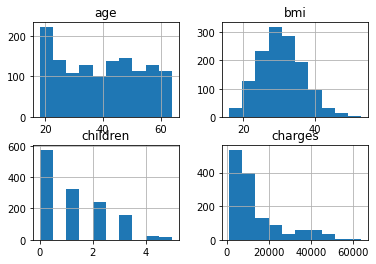

In [137]:
# your code

df.hist()
plt.show()

### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [138]:
# your code

hcorr = df.corr()
hcorr.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

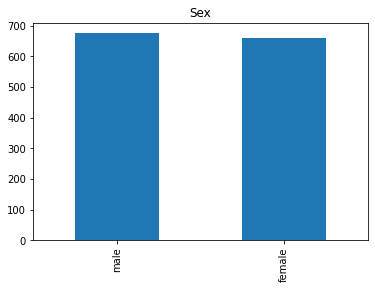

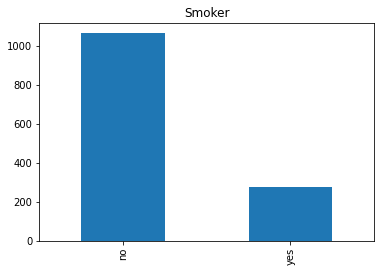

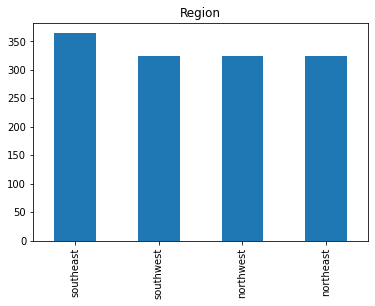

In [139]:
# your code

# bar plot for 'sex' feature
df['sex'].value_counts().plot(kind = 'bar')
plt.title('Sex')
plt.show()

# bar plot for 'smoker' feature
df['smoker'].value_counts().plot(kind = 'bar')
plt.title('Smoker')
plt.show()

# bar plot for 'region' feature
df['region'].value_counts().plot(kind = 'bar')
plt.title('Region')
plt.show()

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

### Q7. Normalize all numerical features

In [140]:
# your code

labelEncoder = LabelEncoder()

# convert 'sex' feature into a numerical feature - label encoding
print('Convert \'sex\' feature into a numerical feature using label encoding:')
print(df['sex'].value_counts())
dfCopy['sex'] = labelEncoder.fit_transform(dfCopy['sex'])
print('\n{}'.format(dfCopy['sex'].value_counts()))

# convert 'smoker' feature into a numerical feature - label encoding
print('\nConvert \'smoker\' feature into a numerical feature using label encoding:')
print(df['smoker'].value_counts())
dfCopy['smoker'] = labelEncoder.fit_transform(dfCopy['smoker'])
print('\n{}'.format(dfCopy['smoker'].value_counts()))

Convert 'sex' feature into a numerical feature using label encoding:
male      676
female    662
Name: sex, dtype: int64

1    676
0    662
Name: sex, dtype: int64

Convert 'smoker' feature into a numerical feature using label encoding:
no     1064
yes     274
Name: smoker, dtype: int64

0    1064
1     274
Name: smoker, dtype: int64


In [141]:
# your code

oneHotEncoder = OneHotEncoder(sparse=False)

# convert 'region' feature into a numerical feature - one-hot encoding
print('Convert \'region\' feature into a numerical feature using one-hot encoding:')
print(df['region'].value_counts())
result = oneHotEncoder.fit_transform(dfCopy[['region']])
regionDf = pd.DataFrame(result, columns=oneHotEncoder.get_feature_names_out())
print(regionDf)

Convert 'region' feature into a numerical feature using one-hot encoding:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
      region_northeast  region_northwest  region_southeast  region_southwest
0                  0.0               0.0               0.0               1.0
1                  0.0               0.0               1.0               0.0
2                  0.0               0.0               1.0               0.0
3                  0.0               1.0               0.0               0.0
4                  0.0               1.0               0.0               0.0
...                ...               ...               ...               ...
1333               0.0               1.0               0.0               0.0
1334               1.0               0.0               0.0               0.0
1335               0.0               0.0               1.0               0.0
1336               0.0               0.0               0.0   

### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [142]:
# delete all the categorial features
df = df.drop('sex', axis=1)
df = df.drop('smoker', axis=1)
df = df.drop('region', axis=1)

# add the converted numerical features back into the dataframe
df = pd.concat([df, dfCopy['sex'], dfCopy['smoker'], regionDf], axis=1)
print(df)

# save the preprocessed data into a new csv file
# from google.colab import files
# df.to_csv('output.csv', encoding = 'utf-8-sig') 
# files.download('output.csv')

      age     bmi  children      charges  sex  smoker  region_northeast  \
0      19  27.900         0  16884.92400    0       1               0.0   
1      18  33.770         1   1725.55230    1       0               0.0   
2      28  33.000         3   4449.46200    1       0               0.0   
3      33  22.705         0  21984.47061    1       0               0.0   
4      32  28.880         0   3866.85520    1       0               0.0   
...   ...     ...       ...          ...  ...     ...               ...   
1333   50  30.970         3  10600.54830    1       0               0.0   
1334   18  31.920         0   2205.98080    0       0               1.0   
1335   18  36.850         0   1629.83350    0       0               0.0   
1336   21  25.800         0   2007.94500    0       0               0.0   
1337   61  29.070         0  29141.36030    0       1               0.0   

      region_northwest  region_southeast  region_southwest  
0                  0.0               0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>